In [9]:
import omegaqe
from omegaqe.powerspectra import Powerspectra
import numpy as np
import matplotlib.pyplot as plt
import camb

plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
power = Powerspectra()
ks = np.logspace(-4, 2, 200)
z = 20
weyl_ps = power.get_matter_ps("weyl", z, ks)

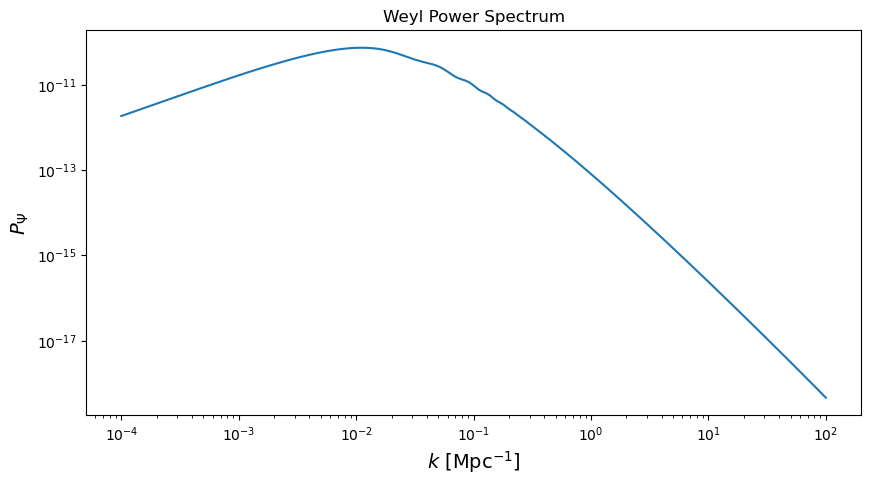

In [4]:
# Weyl Potential
plt.figure()
plt.loglog(ks, weyl_ps)
plt.ylabel("$P_{\Psi}$", fontsize=14)
plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
plt.title("Weyl Power Spectrum")
plt.show()

In [5]:
ellmax = 1000
Nchi = 100
power.recalculate_PK("weyl", ellmax, Nchi)
weyl_ps = power.get_matter_ps("weyl", z, ks)

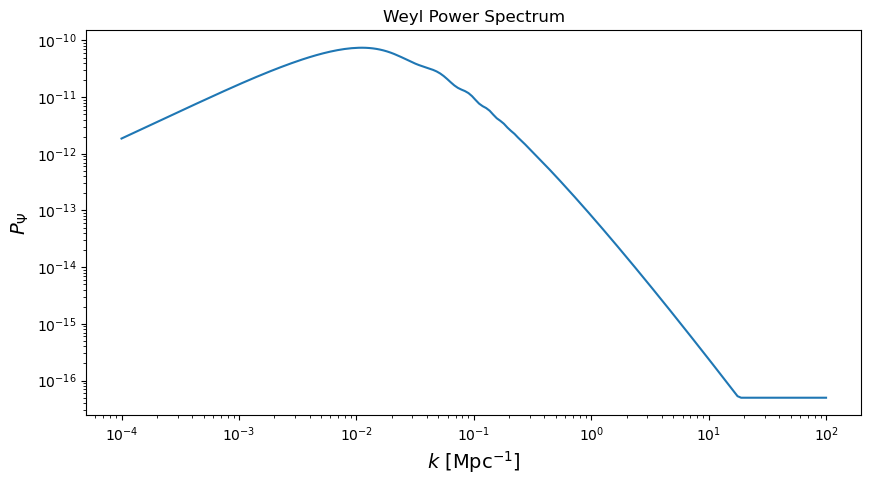

In [6]:
# Weyl Potential
plt.figure()
plt.loglog(ks, weyl_ps)
plt.ylabel("$P_{\Psi}$", fontsize=14)
plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
plt.title("Weyl Power Spectrum")
plt.show()

# Resetting
ellmax = 4000
Nchi = 1000
power.recalculate_PK("weyl", ellmax, Nchi)

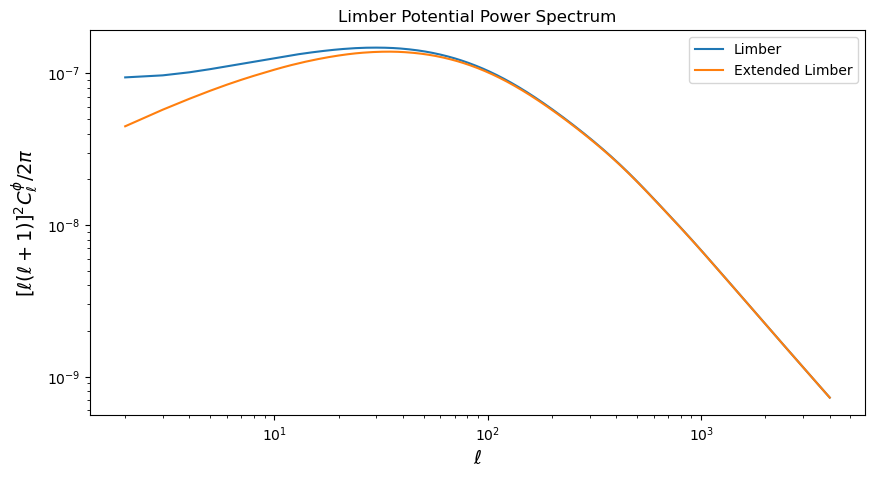

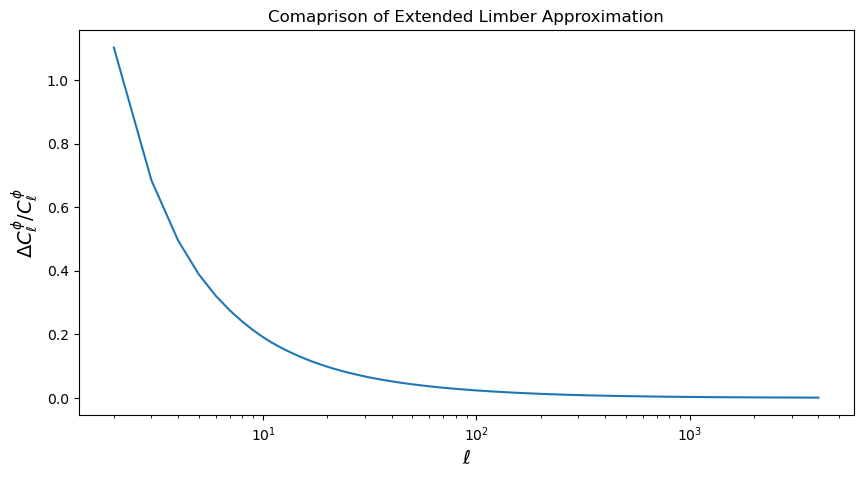

In [7]:
# Limber approximated potentials
ells = np.arange(2, ellmax + 1, 1)
Cl_phi = power.get_phi_ps(ells, extended=False)
plt.figure()
plt.loglog(ells, Cl_phi*(ells*(ells + 1))**2/(2*np.pi), label="Limber")
#plt.xlim(1e1, 1e4)

ells_ext = ells
Cl_phi_ext = power.get_phi_ps(ells, extended=True)
plt.loglog(ells_ext, Cl_phi_ext*(ells_ext*(ells_ext + 1))**2/(2*np.pi), label="Extended Limber")
plt.title("Limber Potential Power Spectrum")
plt.ylabel("$[\ell(\ell+1)]^2C_{\ell}^{\phi}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.legend()

Cl_diff = np.abs(Cl_phi_ext - Cl_phi)/Cl_phi_ext
plt.figure()
plt.semilogx(ells_ext, Cl_diff)
plt.title("Comaprison of Extended Limber Approximation")
plt.ylabel("$\Delta C_{\ell}^{\phi}/C_{\ell}^{\phi}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.show()

In [11]:
#Compare with CAMB using Lensit initialisation:
pars = camb.read_ini(rf"{omegaqe.DATA_DIR}/Lensit_fiducial_flatsky_params.ini")
results = camb.get_results(pars)
ellmax = 4000
Cl_camb=results.get_lens_potential_cls(ellmax)
ells_camb = np.where(Cl_camb[:, 0] > 0)[0]
Cl_camb = Cl_camb[ells_camb, 0]

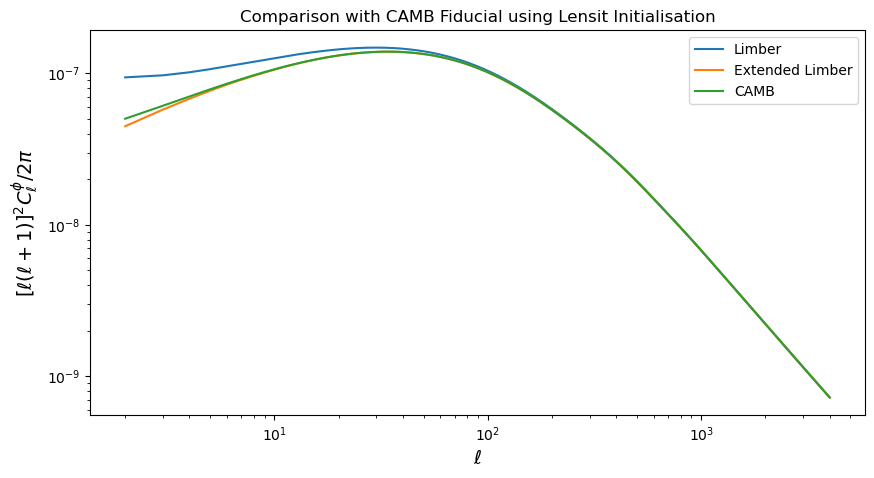

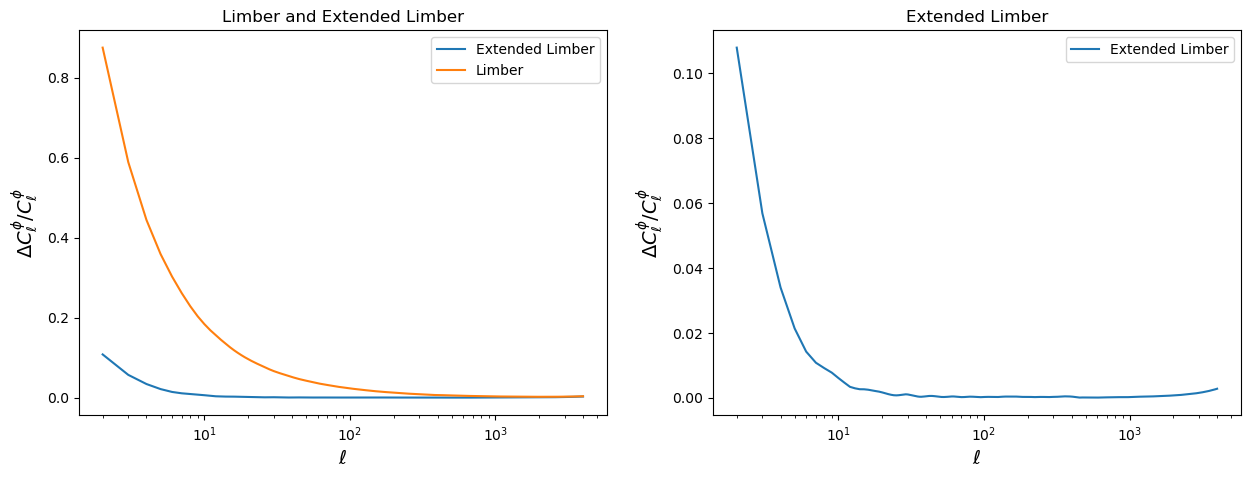

In [12]:
plt.figure()
plt.loglog(ells, Cl_phi*(ells*(ells + 1))**2/(2*np.pi), label="Limber")
plt.loglog(ells_ext, Cl_phi_ext*(ells_ext*(ells_ext + 1))**2/(2*np.pi), label="Extended Limber")
plt.loglog(ells_camb, Cl_camb, label="CAMB")
plt.title("Comparison with CAMB Fiducial using Lensit Initialisation")
plt.ylabel("$[\ell(\ell+1)]^2C_{\ell}^{\phi}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.legend()
plt.show()

Cl_diff_ext = np.abs(Cl_phi_ext*(ells_ext*(ells_ext + 1))**2/(2*np.pi) - Cl_camb)/Cl_camb
Cl_diff = np.abs(Cl_phi*(ells*(ells + 1))**2/(2*np.pi) - Cl_camb)/Cl_camb
fig, ax = plt.subplots(1,2, figsize=[15, 5])
ax[0].semilogx(ells_ext, Cl_diff_ext, label="Extended Limber")
ax[0].semilogx(ells, Cl_diff, label="Limber")
ax[0].set_title("Limber and Extended Limber")
ax[0].set_ylabel("$\Delta C_{\ell}^{\phi}/C_{\ell}^{\phi}$", fontsize=14)
ax[0].set_xlabel("$\ell$", fontsize=14)
ax[0].legend()
ax[1].semilogx(ells_ext, Cl_diff_ext, label="Extended Limber")
ax[1].set_title("Extended Limber")
ax[1].set_ylabel("$\Delta C_{\ell}^{\phi}/C_{\ell}^{\phi}$", fontsize=14)
ax[1].set_xlabel("$\ell$", fontsize=14)
ax[1].legend()
plt.show()

In [13]:
#Compare with CAMB using Lensit initialisation:
pars = camb.read_ini(r"data/Lensit_fiducial_flatsky_params.ini")
results = camb.get_results(pars)
ellmax = 4000
Cl_camb=results.get_lens_potential_cls(ellmax, raw_cl=True)
ells_camb = np.where(Cl_camb[:, 0] > 0)[0]
Cl_camb = Cl_camb[ells_camb, 0]

CAMBValueError: File not found: data/Lensit_fiducial_flatsky_params.ini

In [ ]:
ells = np.arange(2, ellmax + 1, 1)
Cl_kappa = power.get_kappa_ps(ells, extended=False)
Cl_kappa_ext = power.get_kappa_ps(ells, extended=True)
Cl_camb = Cl_camb*((ells_camb*(ells_camb+1))**2)/4
plt.figure()
plt.loglog(ells, Cl_kappa, label="Limber")
plt.loglog(ells_ext, Cl_kappa_ext, label="Extended Limber")
plt.loglog(ells_camb, Cl_camb, label="CAMB")
plt.title("Comparison with CAMB Fiducial using Lensit Initialisation")
plt.ylabel("$[\ell(\ell+1)]^2C_{\ell}^{\kappa}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.legend()
plt.show()

Cl_diff_ext = np.abs(Cl_kappa_ext - Cl_camb)/Cl_camb
Cl_diff = np.abs(Cl_kappa - Cl_camb)/Cl_camb
fig, ax = plt.subplots(1,2, figsize=[15, 5])
ax[0].semilogx(ells_ext, Cl_diff_ext, label="Extended Limber")
ax[0].semilogx(ells, Cl_diff, label="Limber")
ax[0].set_title("Limber and Extended Limber")
ax[0].set_ylabel("$\Delta C_{\ell}^{\kappa}/C_{\ell}^{\kappa}$", fontsize=14)
ax[0].set_xlabel("$\ell$", fontsize=14)
ax[0].legend()
ax[1].set_title("Extended Limber")
ax[1].set_ylabel("$\Delta C_{\ell}^{\kappa}/C_{\ell}^{\kappa}$", fontsize=14)
ax[1].set_xlabel("$\ell$", fontsize=14)
ax[1].legend()
plt.show()

In [14]:
ells = np.arange(2, ellmax + 1, 1)
Cl_phi_100 = power.get_phi_ps(ells, Nchi=100)
Cl_phi_1000 = power.get_phi_ps(ells, Nchi=1000)

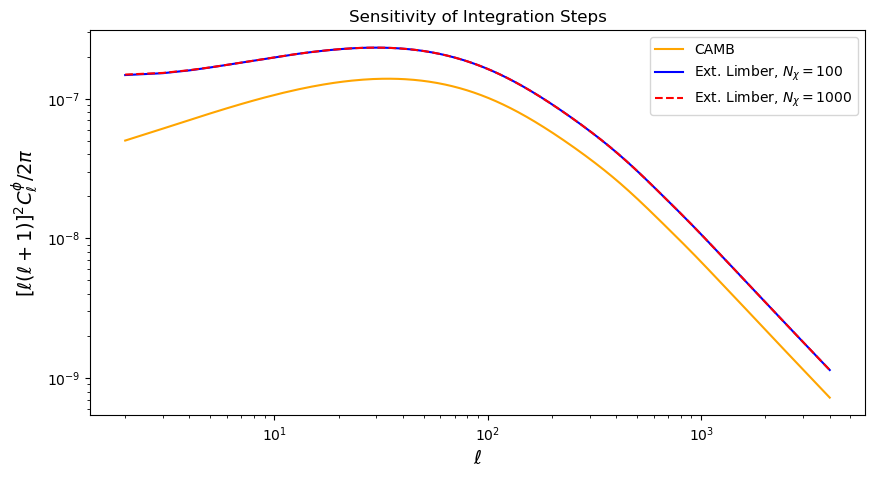

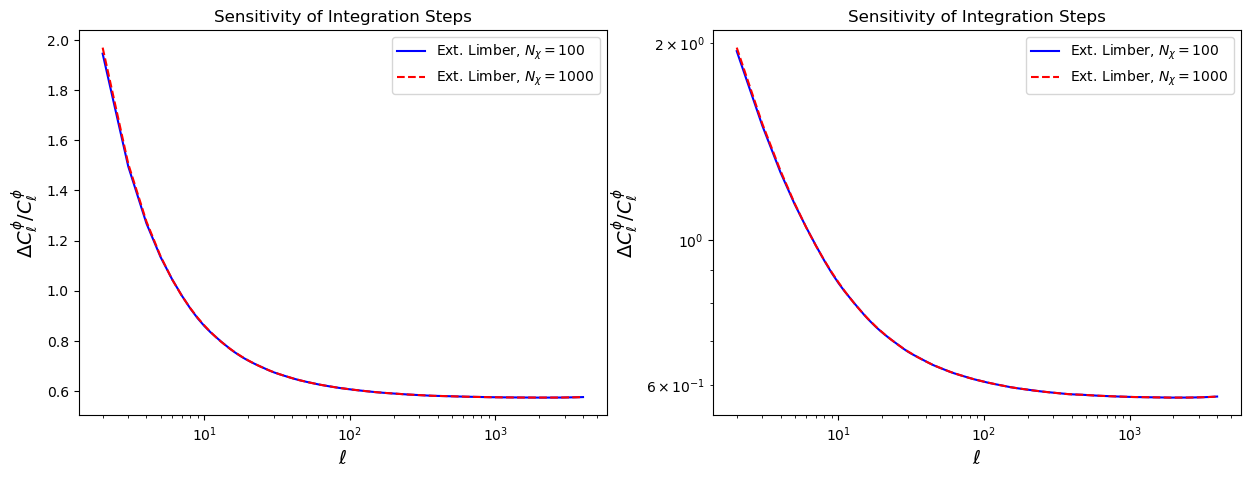

In [15]:
plt.figure()
plt.loglog(ells_camb, Cl_camb, label="CAMB", color="orange")
plt.loglog(ells, Cl_phi_100*(ells*(ells + 1))**2/4, label="Ext. Limber, $N_{\chi}=100$", color="blue")
plt.loglog(ells, Cl_phi_1000*(ells*(ells + 1))**2/4, label="Ext. Limber, $N_{\chi}=1000$", linestyle="--", color="red")
plt.title("Sensitivity of Integration Steps")
plt.ylabel("$[\ell(\ell+1)]^2C_{\ell}^{\phi}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.legend()
plt.show()

Cl_diff_100 = np.abs(Cl_phi_100*(ells*(ells + 1))**2/4 - Cl_camb)/Cl_camb
Cl_diff_1000 = np.abs(Cl_phi_1000*(ells*(ells + 1))**2/4 - Cl_camb)/Cl_camb
fig, ax = plt.subplots(1,2, figsize=[15, 5])
ax[0].semilogx(ells, Cl_diff_100, label="Ext. Limber, $N_{\chi}=100$", color="blue")
ax[0].semilogx(ells, Cl_diff_1000, label="Ext. Limber, $N_{\chi}=1000$", linestyle="--", color="red")
ax[0].set_title("Sensitivity of Integration Steps")
ax[0].set_ylabel("$\Delta C_{\ell}^{\phi}/C_{\ell}^{\phi}$", fontsize=14)
ax[0].set_xlabel("$\ell$", fontsize=14)
ax[0].legend()

ax[1].loglog(ells, Cl_diff_100, label="Ext. Limber, $N_{\chi}=100$", color="blue")
ax[1].loglog(ells, Cl_diff_1000, label="Ext. Limber, $N_{\chi}=1000$", linestyle="--", color="red")
ax[1].set_title("Sensitivity of Integration Steps")
ax[1].set_ylabel("$\Delta C_{\ell}^{\phi}/C_{\ell}^{\phi}$", fontsize=14)
ax[1].set_xlabel("$\ell$", fontsize=14)
ax[1].legend()
plt.show()

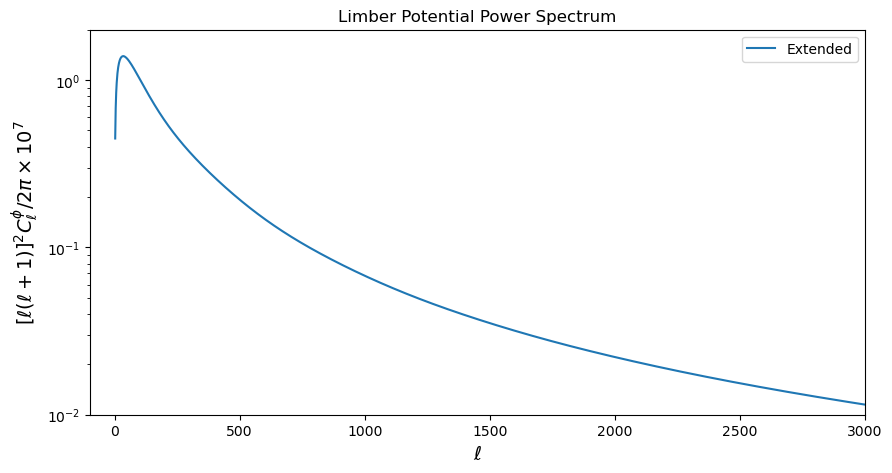

In [16]:
plt.figure()
plt.semilogy(ells_ext, 1e7*Cl_phi_ext*(ells_ext*(ells_ext + 1))**2/(2*np.pi), label="Extended")
plt.title("Limber Potential Power Spectrum")
plt.ylabel(r"$[\ell(\ell+1)]^2C_{\ell}^{\phi}/2\pi \times 10^7$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(-100, 3000)
plt.ylim(1e-2, 2e0)
plt.legend()
plt.show()

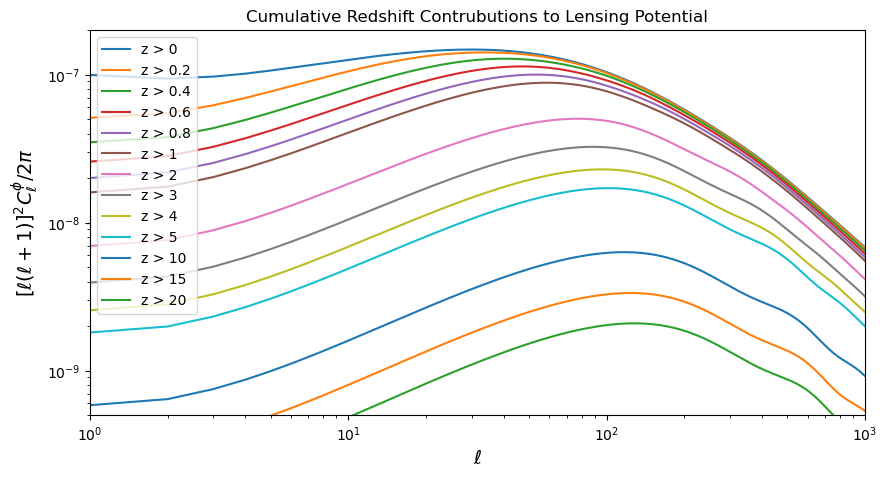

In [17]:
ellmax = 1000
ells = np.arange(1, ellmax + 1, 1)
for z in [0, 0.2, 0.4, 0.6, 0.8, 1, 2, 3, 4, 5, 10, 15, 20]:
    Cl = power.get_phi_ps(ells, zmin=z)

    plt.loglog(ells, Cl*(ells*(ells + 1))**2/(2*np.pi), label=f"z > {z}")
    plt.legend()
    plt.title("Cumulative Redshift Contrubutions to Lensing Potential")
    plt.ylabel("$[\ell(\ell+1)]^2C_{\ell}^{\phi}/2\pi$", fontsize=14)
    plt.xlabel("$\ell$", fontsize=14)
    plt.xlim(1, 1e3)
    plt.ylim(5e-10, 2e-7)
plt.show()

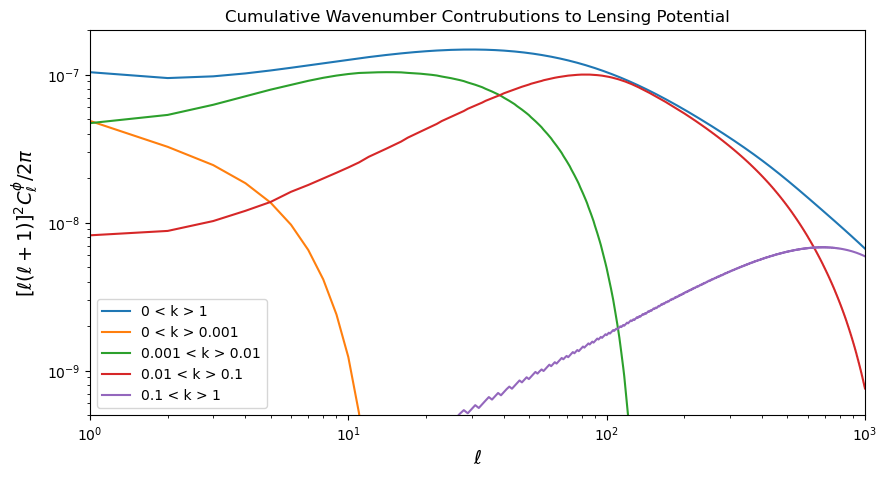

In [18]:
for kmin, kmax in [(0, 1), (0, 1e-3), (1e-3, 1e-2), (1e-2, 0.1), (0.1, 1)]:
    Cl = power.get_phi_ps(ells, Nchi=1000, kmin=kmin, kmax=kmax)

    plt.loglog(ells, Cl*(ells*(ells + 1))**2/(2*np.pi), label=f"{kmin} < k > {kmax}")
    plt.legend()
    plt.title("Cumulative Wavenumber Contrubutions to Lensing Potential")
    plt.ylabel("$[\ell(\ell+1)]^2C_{\ell}^{\phi}/2\pi$", fontsize=14)
    plt.xlabel("$\ell$", fontsize=14)
    plt.xlim(1, 1e3)
    plt.ylim(5e-10, 2e-7)
plt.show()